# Modeling Process

#### The Model list

* Linear Regression with one feature (Simplest)
* Linear Regression with all features
* Ridge Regression
* Lasso Regression
* Polynomial Regression
* Generalized Linear Model

In [81]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.tools.tools as sm
import matplotlib.pyplot as plt
import pandas as pd
from numpy import inf
from sklearn.model_selection import train_test_split,cross_val_score

#### Linear Regression with one feature

In [70]:
playlists_dataframe = pd.read_json("playlists_dataframe_904_with_name_dummy.json")

In [79]:
# playlists_dataframe = playlists_dataframe.drop(["artist_pop_mean","artist_pop_std"],axis=1)
playlists_dataframe.head()

,acous_mean,acous_std,avaiable_market,dance_mean,dance_std,energy_mean,energy_std,followers,genre_narrow_blues,genre_narrow_children,...,live_mean,live_std,loud_mean,loud_std,name,pop_mean,pop_std,tracks_num,valence_mean,valence_std
0,0.359143,0.250984,62,0.638020,0.142906,0.524420,0.119544,479208,0,0,...,0.138882,0.104181,-8.670040,2.184986,Underground Hits,55.740000,8.666741,50,0.347734,0.221925
1,0.229237,0.238325,62,0.605630,0.120167,0.633960,0.162232,698551,0,0,...,0.153161,0.109844,-7.097310,2.163768,Indie Pop,48.420000,9.869326,100,0.442500,0.229449
10,0.187399,0.191098,62,0.722077,0.097251,0.622862,0.134458,541966,0,0,...,0.166531,0.149703,-7.418354,2.262915,Beach Vibes,48.446154,15.647099,65,0.665046,0.199263
100,0.691909,0.166908,62,0.522591,0.062916,0.541273,0.123745,7724,0,0,...,0.222882,0.170382,-10.187818,2.339954,Let There Be Bop,27.454545,2.934548,22,0.711000,0.130829
101,0.250850,0.292580,62,0.470760,0.113546,0.554920,0.182416,5189,1,0,...,0.168464,0.100586,-10.077320,3.124915,Brit Blues,32.080000,18.022031,25,0.584160,0.200569


C:\Users\Haixing\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


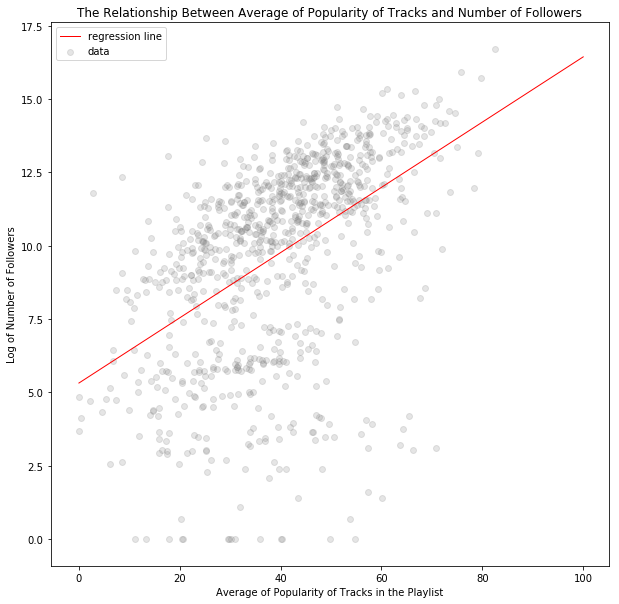

In [132]:
y = playlists_dataframe['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = playlists_dataframe['pop_mean']

X_const = sm.add_constant(X)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

regression_line = lambda x: regression.coef_[1] * x +regression.intercept_

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x_vals = np.linspace(0,100,100)
ax.plot(x_vals, regression_line(x_vals), color='red', linewidth=1.0, label='regression line')
ax.scatter(X, y_log, color='gray', alpha=0.2, label='data')

ax.set_xlabel('Average of Popularity of Tracks in the Playlist')
ax.set_ylabel('Log of Number of Followers')
ax.set_title('The Relationship Between Average of Popularity of Tracks and Number of Followers')
ax.legend(loc='best')
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=6)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

score = cross_val_score(estimator = regression, X = X_const, y = y_log , cv=5)
score

The train MSE is 9.188335367548303, the test MSE is 7.564692068439904


array([ 0.16763925,  0.23816582, -0.44006665, -0.15651203, -0.11731963])

#### Linear Regression with all features

In [133]:
y = playlists_dataframe['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = playlists_dataframe.drop(['followers','name'], axis=1)

X_const = sm.add_constant(X)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

C:\Users\Haixing\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=6)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

score = cross_val_score(estimator = regression, X = X_const, y = y_log , cv=5)
score

The train MSE is 6.554762958961164, the test MSE is 5.208039242968286


array([ 0.35750715,  0.329864  , -0.61316005,  0.31272606,  0.11999228])

#### RidgeRegression

In [214]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
ridge_regression = RidgeCV(alphas=(10.**np.arange(-5, 5)), fit_intercept=True)
ridge_regression.fit(X_train, y_train)
print('R2 of the model with Ridge on test set : {}'.format(ridge_regression.score(X_test,y_test)))

R2 of the model with Ridge on test set : 0.4706984060312683


#### LASSO Regression

In [212]:
lasso_regression = LassoCV(alphas=(10.**np.arange(-5, 5)), fit_intercept=True)
lasso_regression.fit(X_train, y_train)
print('R2 of the model with Lasso on test set : {}'.format(lasso_regression.score(X_test, y_test)))

R2 of the model with Lasso on test set : 0.4781777376858846


#### Polynomial Regression

In [202]:
from sklearn.preprocessing import PolynomialFeatures
gen_poly_terms = PolynomialFeatures(degree=2, interaction_only=False)

X_train_with_poly = gen_poly_terms.fit_transform(X_train)
X_test_with_poly = gen_poly_terms.fit_transform(X_test)

poly_regression_model = LinearRegression(fit_intercept=True)
poly_regression_model.fit(X_train_with_poly, y_train)

train_MSE= np.mean((y_train - poly_regression_model.predict(X_train_with_poly))**2)
test_MSE= np.mean((y_test - poly_regression_model.predict(X_test_with_poly))**2)
print('The train MSE for degree 2 poly model is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = poly_regression_model.score(X_train_with_poly, y_train)
test_R_sq = poly_regression_model.score(X_test_with_poly, y_test)
print('The train R^2 for degree 2 poly model is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE for degree 2 poly model is 5.144097257424274, the test MSE is 8.593229989106499
The train R^2 for degree 2 poly model is 0.5762198061816981, the test R^2 is 0.11687909332966384


In [207]:
train_R_sq = []
test_R_sq = []
max_deg = 5

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

for d in range(max_deg + 1):

    out = d * 1. / max_deg * 100

    gen_poly_terms = PolynomialFeatures(degree=d, interaction_only=False)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model = LinearRegression(fit_intercept=False)
    poly_regression_model.fit(X_train_with_poly, y_train)
    
    train_R_sq.append(poly_regression_model.score(X_train_with_poly, y_train))
    test_R_sq.append(poly_regression_model.score(X_test_with_poly, y_test))

In [208]:
train_R_sq,test_R_sq

([0.0,
  0.4170187558068047,
  0.57622013971638408,
  0.70245807127376159,
  0.87207142041927044,
  1.0],
 [-0.022965486740702982,
  0.46614571182353076,
  -15777451258024084.0,
  -1.2409555443452733,
  -935.61439805473572,
  -96165.889912531216])

In [229]:
upgrade_dataframe = playlists_dataframe[[ 'followers', 'genre_narrow_blues',
       'genre_narrow_children', 'genre_narrow_classical', 'genre_narrow_dance',
       'genre_narrow_electronic', 'genre_narrow_funk', 'genre_narrow_hardcore',
       'genre_narrow_healing', 'genre_narrow_hiphop', 'genre_narrow_jazz',
       'genre_narrow_metal', 'genre_narrow_modern', 'genre_narrow_other',
       'genre_narrow_pop', 'genre_narrow_rap', 'genre_narrow_rock',
       'genre_narrow_soul', 'instru_mean', 'instru_std', 'name', 'pop_mean', 'pop_std',
       'tracks_num']]
y = upgrade_dataframe['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = upgrade_dataframe.drop(['followers','name'], axis=1)
X_const = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=17)

In [228]:
# Load modules and data
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Instantiate a gamma family model with the default link function.
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())

poisson_results = poisson_model.fit()

y_hat = poisson_results.predict(X_test)
print(r2_score(y_test,y_hat))
print(poisson_results.summary())

0.444923294089
                 Generalized Linear Model Regression Results                  
Dep. Variable:              followers   No. Observations:                  605
Model:                            GLM   Df Residuals:                      583
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1529.1
Date:                Thu, 07 Dec 2017   Deviance:                       659.21
Time:                        17:09:50   Pearson chi2:                     502.
No. Iterations:                     4                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.5208      0.079     19.282      0.000       1.366       1.67

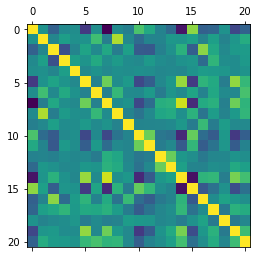

In [169]:
plt.matshow(dataframe.corr())
plt.show()